In [82]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import math

## Read in Data and Split into months

In [424]:
df_math_sept = pd.read_excel('Data/StATActivity-Data&Analysis.xlsx', sheetname=1)
df_math_dec = pd.read_excel('Data/StATActivity-Data&Analysis.xlsx', sheetname=2)

df_math_sept.head()
df_math_dec.head()

,Student ID,FirstName,Class,Category,% Correct,Proficiency Level:
0,101932,Amber,Michigan,[Dec 10-11] Gr1 IA Math 10-11,48.5,Below
1,101927,D'anwill,Michigan,[Dec 10-11] Gr1 IA Math 10-11,64.5,Below
2,101908,Ibrahim,Virginia,[Dec 10-11] Gr1 IA Math 10-11,37.5,Below
3,103234,Kareen,Michigan,[Dec 10-11] Gr1 IA Math 10-11,50.6,Below
4,101955,Nia,Virginia,[Dec 10-11] Gr1 IA Math 10-11,40.3,Below


### Plot Scores from September and December in Histogram Form

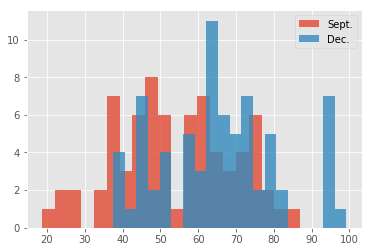

In [159]:
plt.figure()
df_math_sept['% Correct'].hist(bins=20, alpha=0.8, label='Sept.')
df_math_dec['% Correct'].hist(bins=20, alpha=0.8, label='Dec.')
plt.legend()

Noticable shift from Sept -> Dec

In [168]:
sept_attr = (df_math_sept['% Correct'].mean(), df_math_sept['% Correct'].median(),max(df_math_sept['% Correct'])-min(df_math_sept['% Correct']))
dec_attr = (df_math_dec['% Correct'].mean(), df_math_dec['% Correct'].median(),max(df_math_dec['% Correct'])-min(df_math_dec['% Correct']))

print('Change in\nMean: {}\nMedian: {}\nRange: {}'.format(*[round(x-y,2) for x, y in zip(dec_attr,sept_attr)]))

Change in
Mean: 11.81
Median: 12.15
Range: -6.6


## Anonymize and Work with Entire Grade

In [130]:
sept_grades = df_math_sept[['Student ID','% Correct']].set_index('Student ID')
sept_grades.rename(columns={'% Correct': 'Sept % Correct'}, inplace=True)
dec_grades = df_math_dec[['Student ID', '% Correct']].set_index('Student ID')
dec_grades.rename(columns={'% Correct': 'Dec % Correct'}, inplace=True)
grades = sept_grades.join(dec_grades, how='left')
grades['% Change'] = grades['Dec % Correct'] - grades['Sept % Correct']
grades.sort_values('% Change', ascending=False, axis=0, inplace=True);
grades.head()

,Sept % Correct,Dec % Correct,% Change
Student ID,,,
101986,28.7,95.7,67.0
101898,37.4,95.7,58.3
103167,40.1,95.7,55.6
101938,45.5,95.7,50.2
101914,33.0,78.2,45.2


In [456]:
grades.mean()

Sept % Correct    53.919444
Dec % Correct     65.729167
% Change          11.809722
dtype: float64

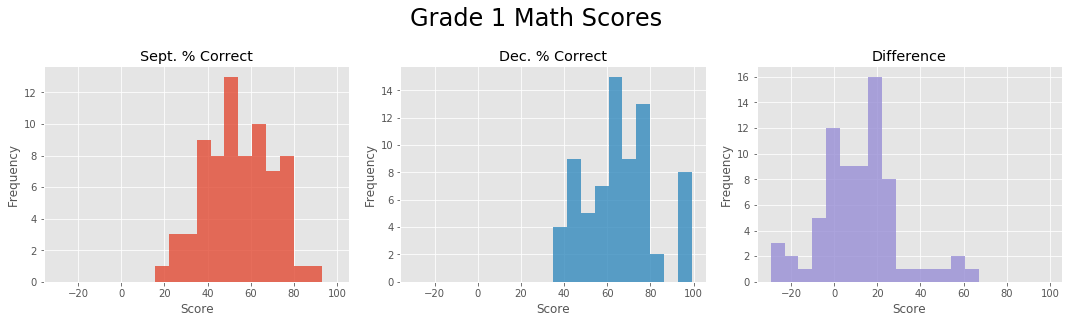

In [410]:
plt.figure()
ax=grades.plot(kind='hist', subplots=True, alpha=0.8, bins = 20, legend=False,\
            layout=(1,3),figsize=(15,4),title=['Sept. % Correct', 'Dec. % Correct', 'Difference'])
plt.suptitle('Grade 1 Math Scores',fontsize=24,y=1.11)
for i in range(len(ax[0])):
    ax[0][i].set_xlabel('Score')
plt.tight_layout()

### Split into classes

In [191]:
Michigan_math = df_math_sept.set_index('Student ID').join(df_math_dec.set_index('Student ID'), how='left', rsuffix='_Dec')
Virginia_math = Michigan_math[['Class','First Name','% Correct','% Correct_Dec']][Michigan_math['Class']== 'Virginia']
Cornell_math = Michigan_math[Michigan_math[['Class','First Name','% Correct','% Correct_Dec']]['Class']== 'Cornell']
Michigan_math = Michigan_math[Michigan_math[['Class','First Name','% Correct','% Correct_Dec']]['Class']== 'Michigan']

Virginia_math['Diff'] = Virginia_math['% Correct_Dec'] - Virginia_math['% Correct']
Cornell_math['Diff'] = Cornell_math['% Correct_Dec'] - Cornell_math['% Correct']
Michigan_math['Diff'] = Michigan_math['% Correct_Dec'] - Michigan_math['% Correct']

In [292]:
class_improvement = {'Virginia':Virginia_math.Diff.mean(),'Cornell': Cornell_math.Diff.mean(),\
                     'Michigan':Michigan_math.Diff.mean()}
for k,v in class_improvement.items():
    print('{} improved by {}%'.format(k,round(v,1)))

Michigan improved by 16.8%
Cornell improved by 8.5%
Virginia improved by 10.2%


### Plot each class histogram

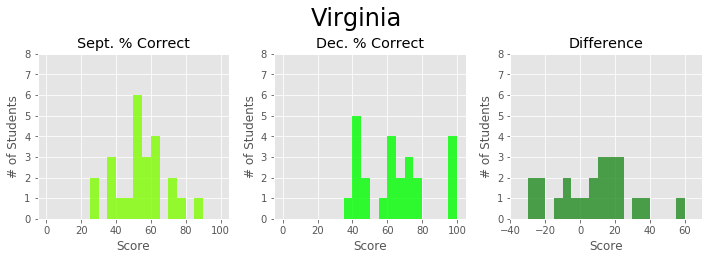

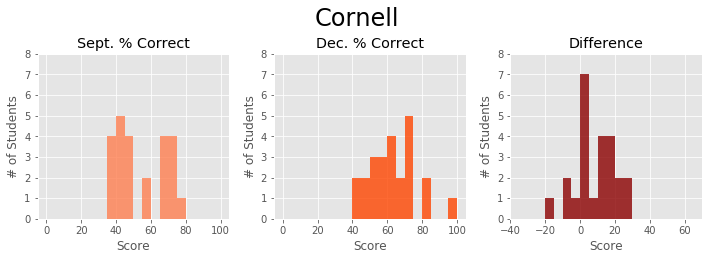

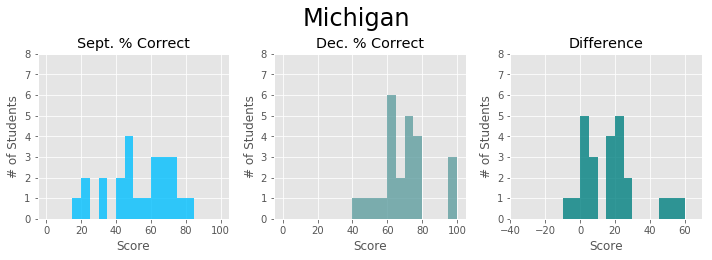

In [388]:
fig, ax = plt.subplots(1,3,figsize=(10,3.3), subplot_kw={'ylim': (0,8)})
fig.suptitle('Virginia',fontsize=24, y=1.08)
for axis in ax:
    axis.set(xlabel="Score", ylabel="# of Students")
ax[0].set_title('Sept. % Correct')
ax[1].set_title('Dec. % Correct')
ax[2].set_title('Difference')
Virginia_math['% Correct'].hist(color='chartreuse',alpha=0.8, bins = 20,\
                           label='Virginia',range=[0, 100], ax= ax[0])
Virginia_math['% Correct_Dec'].hist(color='lime',alpha=0.8, bins = 20,\
                           label='Virginia',range=[0, 100], ax= ax[1])
Virginia_math['Diff'].hist(color='forestgreen',alpha=0.8, bins = 20,\
                           label='Virginia',range=[-35, 65],  ax= ax[2])
fig.tight_layout()


fig, ax = plt.subplots(1,3,figsize=(10,3.3),subplot_kw={'ylim': (0,8)})
fig.suptitle('Cornell',fontsize=24, y=1.08)
for axis in ax:
    axis.set(xlabel="Score", ylabel="# of Students")
    ax[0].set_title('Sept. % Correct')
ax[1].set_title('Dec. % Correct')
ax[2].set_title('Difference')
Cornell_math['% Correct'].hist(color='coral',alpha=0.8, bins = 20,\
                           label = 'Cornell',range=[0, 100], ax= ax[0])
Cornell_math['% Correct_Dec'].hist(color='orangered',alpha=0.8, bins = 20,\
                           label = 'Cornell',range=[0, 100], ax= ax[1])
Cornell_math['Diff'].hist(color='darkred',alpha=0.8, bins = 20,\
                           label = 'Cornell',range=[-35, 65],  ax= ax[2])
fig.tight_layout()


fig, ax = plt.subplots(1,3,figsize=(10,3.3),subplot_kw={'ylim': (0,8)})

fig.suptitle('Michigan',fontsize=24, y=1.08)
for axis in ax:
    axis.set(xlabel="Score", ylabel="# of Students")
ax[0].set_title('Sept. % Correct')
ax[1].set_title('Dec. % Correct')
ax[2].set_title('Difference')
Michigan_math['% Correct'].hist(color='deepskyblue',alpha=0.8, bins = 20,\
                           label = 'Michigan',range=[0, 100],  ax= ax[0])
Michigan_math['% Correct_Dec'].hist(color='cadetblue',alpha=0.8, bins = 20,\
                           label = 'Michigan',range=[0, 100], ax= ax[1])
Michigan_math['Diff'].hist(color='teal',alpha=0.8, bins = 20,\
                           label = 'Michigan',range=[-35, 65], ax= ax[2])
fig.tight_layout()

### Further Graphical Analysis
Further grahical analysis can be found here: http://bit.ly/SABronx1GA
The analysis includes growth curves and be looked at on the grade level and by class.

## Analysis of Progress

In [445]:
print('{} students have shown improvement and {} have shown regression.'.format(\
            grades['% Change'][grades['% Change'] > 0].count(),grades['% Change'][grades['% Change'] < 0].count()))

58 students have shown improvement and 14 have shown regression.


In [312]:
most_prog = df_math_sept[['First Name', 'Class', 'Student ID']][df_math_sept['Student ID'] == grades.index[0]]
least_prog = df_math_sept[['First Name', 'Class', 'Student ID']][df_math_sept['Student ID'] == grades.index[-1]]

In [331]:
most_prog['Improvement'] = grades['% Change'].loc[most_prog['Student ID']].values
least_prog['Improvement'] = grades['% Change'].loc[least_prog['Student ID']].values

In [432]:
print('Most Progress:\n{} in {} Class: {}\nLeast Progress:\n{} in {}: {}'.\
      format(*[most_prog.values[0][i] for i in [0,1,-1]]+[least_prog.values[0][i] for i in [0,1,-1]]))

Most Progress:
Aneuris in Virginia Class: 67.0
Least Progress:
Ashhab in Virginia: -29.400000000000006


In [429]:
top_five = df_math_sept[['First Name', 'Class', 'Student ID']][df_math_sept['Student ID'].isin(grades.index[:5])].set_index('Student ID')
bottom_five = df_math_sept[['First Name', 'Class', 'Student ID']][df_math_sept['Student ID'].isin(grades.index[-5:])].set_index('Student ID')

In [440]:
top_five = top_five.join(grades['% Change']).sort_values('% Change', ascending=False, axis=0)
bottom_five = bottom_five.join(grades['% Change']).sort_values('% Change', ascending=False, axis=0)

In [457]:
top_five

,First Name,Class,% Change
Student ID,,,
101986,Aneuris,Virginia,67.0
101898,Alex,Virginia,58.3
103167,Sophaine,Michigan,55.6
101938,Jalen,Michigan,50.2
101914,Robert,Michigan,45.2


In [442]:
bottom_five

,First Name,Class,% Change
Student ID,,,
101960,Kam'Rynn,Cornell,-19.2
101974,Mya,Virginia,-20.4
101908,Ibrahim,Virginia,-23.4
101963,Oumou,Virginia,-29.0
101905,Ashhab,Virginia,-29.4


In [461]:
Michigan_math.median()

% Correct        54.65
% Correct_Dec    69.40
Diff             16.95
dtype: float64

In [462]:
Virginia_math.median()

% Correct        53.5
% Correct_Dec    63.4
Diff             12.1
dtype: float64

In [463]:
Cornell_math.median()

% Correct        47.80
% Correct_Dec    63.20
Diff              9.25
dtype: float64

## Anonymizing Data

In [373]:
import hashlib
anon_data = df_math_sept.set_index('Student ID')
anon_data['First Name'] = [hashlib.md5(val.encode('utf-8')).hexdigest() for val in anon_data['First Name']]
anon_data['Class'] = [hashlib.md5(val.encode('utf-8')).hexdigest() for val in anon_data['Class']]

In [374]:
anon_data[['First Name','Class','% Correct','Proficiency Level:']].head()

,First Name,Class,% Correct,Proficiency Level:
Student ID,,,,
102090,2b8a7111ff8625d4d1e88cee62cde0f6,32975dde4a99518d0dd37352167da63a,49.1,Below
101906,873b8090f6454551dcba3ef195ab5fdb,d838a193f4b45fc026435fcfaed69928,43.5,Below
101982,882538ddfa1554742f0f0c762f97ddfc,412fc58156e5b3c0152d0ae0f015a5df,68.2,Approaching
101947,7883cd32b17b988c2e7c6c8cdac5e84a,32975dde4a99518d0dd37352167da63a,47.8,Below
101898,7794a83d18f0384868b7fa5a11b5cfdc,d838a193f4b45fc026435fcfaed69928,37.4,Below
